# CNN-lytical Assignment-1
*  In this assignment, we will build a classifier for MNIST from scratch using just [NumPy](https://numpy.org/)

*  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits of size 28x28

*  The dataset that you are expected to use for training can be found [here](https://drive.google.com/file/d/1z7lwIml6UxsNpDIW3_mPPEb8SoaPC5Zg/view)

*   Our model will have 1 hidden layer, like the one below (not our recommendation to use 256 in the hidden layer though, try various values out)

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

<center>
<img src="https://user-images.githubusercontent.com/81357954/166119893-4ca347b8-b1a4-40b8-9e0a-2e92b5f164ae.png">
</center>

## Import libraries here
NumPy, Matplotlib, ...

Also remember to initialize the seed for reproducibility of results

In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
import math

## Load *Dataset*
Load data from the given pickle file

In [2]:
# mount Google Drive to access the dataset

# load the data set
with open ("train_data.pkl",'rb') as mydata:
    dataset=pickle.load(mydata)
print(dataset)

X = dataset['X']
y = dataset['y']


StandDev=np.std(X,axis=0,keepdims=True)
Mean=np.mean(X,axis=0,keepdims=True)
Normalised_X=(X-Mean)/(StandDev+1e-7)

# normalize

# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library
testsize=0.5
X_train, X_test, y_train, y_test = train_test_split(Normalised_X, y, test_size=testsize, random_state=42)

{'X': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'y': array([[6],
       [9],
       [8],
       ...,
       [1],
       [8],
       [6]], dtype=uint8)}


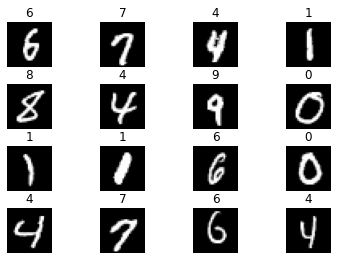

In [3]:
for i in range(16):
    plt.subplot(4,4,i+1)
    index=random.randrange(0,60000)
    image = X[index]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(y[index][0])
    plt.axis('off')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

## Building up parts of our classifier

**Activation functions**

In [4]:
def relu(z):
    return np.maximum(0,z)

def softmax(z):
    reduced=z-np.max(z, axis=1,keepdims=True)
    exponentiated=np.exp(reduced)
    denominator=np.sum(exponentiated,axis=1,keepdims=True)
    return exponentiated/denominator

def sigmoid(z):
    return 1/(1+np.exp(-z))


**Notes about the Neural Network** 
*   Input size is (784,) because 28x28 = 784
*   Output size will be 10, each element represeting probability of the image representing that digit
*   Size of the hidden layer is a hyperparameter



**Initialize the layers weights**

Generally, we follow the convention that weights are drawn from a standard normal distribution, while the bias vectors are initialized to zero. But you can try everything out :)

In [5]:
def init_params(inp,mid,out):
    w0=0.01*np.random.randn(inp,mid)/math.sqrt(inp/2)
    b0=np.zeros([mid,1])
    w1=0.01*np.random.randn(mid,out)/math.sqrt(mid/2)
    b1=np.zeros([out,1])
    return (w0,b0,w1,b1)
    

**Forward Propagation**

In [6]:
def forward_propg(X, weights):
    
    (w0,b0,w1,b1)=weights
    output1=relu(X@w0+b0.T)
    output2=output1@w1+b1.T
    
    """
    X: input data
    returns: logits, output of each layer z1,z2,a1,a2
    """
    return (output1,output2)


**Backward Propagation**


You may use stochastic gradient descent or batch gradient descent here. Feel free to use any loss function.

In [7]:
def backward_propg(weights, X, y, outputs,lr):
    
    output1,output2=outputs
    (w0,b0,w1,b1)=weights
    
    N=X.shape[0]
    grad_output2=softmax(output2)/N
    for i in range(N):
        grad_output2[i][y[i]]-=1/N
    grad_b1=np.sum(grad_output2,axis=0,keepdims=True).T
    grad_w1=output1.T@grad_output2
    grad_output1=grad_output2@w1.T
    grad_relu=grad_output1*(output1>0)
    grad_b0=np.sum(grad_relu,axis=0,keepdims=True).T
    grad_w0=X.T@grad_relu
    
    w0-=lr*grad_w0
    b0-=lr*grad_b0
    w1-=lr*grad_w1
    b1-=lr*grad_b1
    
    return(w0,b0,w1,b1)
    
    """
    should update the weights and return updated weights
    """
    

In [8]:
def cost_func(y,output2):
    cost=0
    exponentiated=softmax(output2)
    for i in range(np.size(output2,0)):
        cost+= -np.log(exponentiated[i][y[i]])/(np.size(output2,0))
    
    return cost
    """
    calculate loss to check whether it is decreasing at each epoch or not
    one can return this in backward propagation as well
    """


## Integrate everything

In [9]:
def train(X, y, hidden_nodes, epochs=1000, lr=1e-5):
    """
    hidden_nodes: no. of nodes in hidden layer

    should return the updated optimize weights.
    """
    inp=X.shape[1]
    mid=hidden_nodes
    out=10
    weights=init_params(inp,mid,out)

    for i in range(epochs):
        # forward propagation
        outputs=forward_propg(X,weights)
        
        # print cost at every 100 or so iterations
        if i%50==0:
            print("cost after {} iterations is: ".format(i),cost_func(y,outputs[1]))
            
        # backward propagation
        
        weights=backward_propg(weights,X,y,outputs,lr)
        
    return weights
        

In [10]:
def predict(X, updated_weights):
    
    (w0,b0,w1,b1)=updated_weights
    output=forward_propg(X,updated_weights)[1]
    max_elements=np.max(output,axis=1,keepdims=True)
    y=np.zeros([X.shape[0],1])
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            if output[i][j]==max_elements[i]:
                y[i]=j
                break
    
    return y

    """
    returns the prediction in [0,9] for each element in X
    """

In [11]:
def accuracy(predictions, y):
    
    return np.mean(predictions==y)*100
    """
    prints % accuracy
    """

In [16]:
weights=train(X_train,y_train,256,lr=1)
print(accuracy(predict(X_test,weights),y_test))


cost after 0 iterations is:  [2.30255616]
cost after 50 iterations is:  [0.20461041]
cost after 100 iterations is:  [0.13433859]
cost after 150 iterations is:  [0.09617488]
cost after 200 iterations is:  [0.0713806]
cost after 250 iterations is:  [0.05427288]
cost after 300 iterations is:  [0.0421479]
cost after 350 iterations is:  [0.03331081]
cost after 400 iterations is:  [0.02678878]
cost after 450 iterations is:  [0.02189089]
cost after 500 iterations is:  [0.01816054]
cost after 550 iterations is:  [0.01529209]
cost after 600 iterations is:  [0.01305103]
cost after 650 iterations is:  [0.01127229]
cost after 700 iterations is:  [0.0098383]
cost after 750 iterations is:  [0.00866903]
cost after 800 iterations is:  [0.0077053]
cost after 850 iterations is:  [0.00690324]
cost after 900 iterations is:  [0.00622852]
cost after 950 iterations is:  [0.00565658]
96.60333333333332


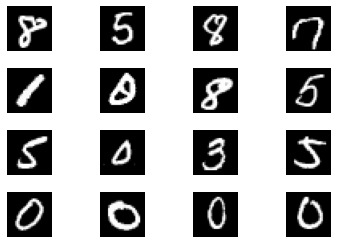

In [17]:

# X_test_show=X_test*(StandDev+1e-7)+Mean

# for i in range(16):
#     plt.subplot(4,4,i+1)
#     index=random.randrange(0,60000*testsize)
#     image = X_test_show[index]
#     image = np.array(image, dtype='float')
#     pixels = image.reshape((28, 28))
#     plt.imshow(pixels, cmap='gray')
# #     plt.title(predict(X_test_show[index],weights))
#     plt.axis('off')
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.4)
# plt.show()

### Save as pickle

In [18]:
roll_num = "210050100" # enter ldap
hidden_dim = 256 # replace with your own hidden dimension

model_dict = {
    'z': hidden_dim, # hidden dimension of your model
    'layer_0_wt': weights[0], # layer 0 weight (784, z)
    'layer_0_bias': weights[1], # layer 0 bias (z, 1)
    'layer_1_wt': weights[2], # layer 1 weight (z, 10)
    'layer_1_bias': weights[3] # layer 1 bias (10, 1)
}

assert model_dict['layer_0_wt'].shape == (784, hidden_dim)
assert model_dict['layer_0_bias'].shape == (hidden_dim, 1)
assert model_dict['layer_1_wt'].shape == (hidden_dim, 10)
assert model_dict['layer_1_bias'].shape == (10, 1)

with open(f'model_{roll_num}.pkl', 'wb') as f:
    pickle.dump(model_dict, f)
    files.download(f'model_{roll_num}.pkl') # download the file from the Colab session for submission

NameError: name 'files' is not defined